# AppTrainers's first assignment.
# By Ahmad Jerjees.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('traffic.csv')
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [6]:
df.shape

(2976, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [8]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


# 1.Vehicle Distribution Analysis

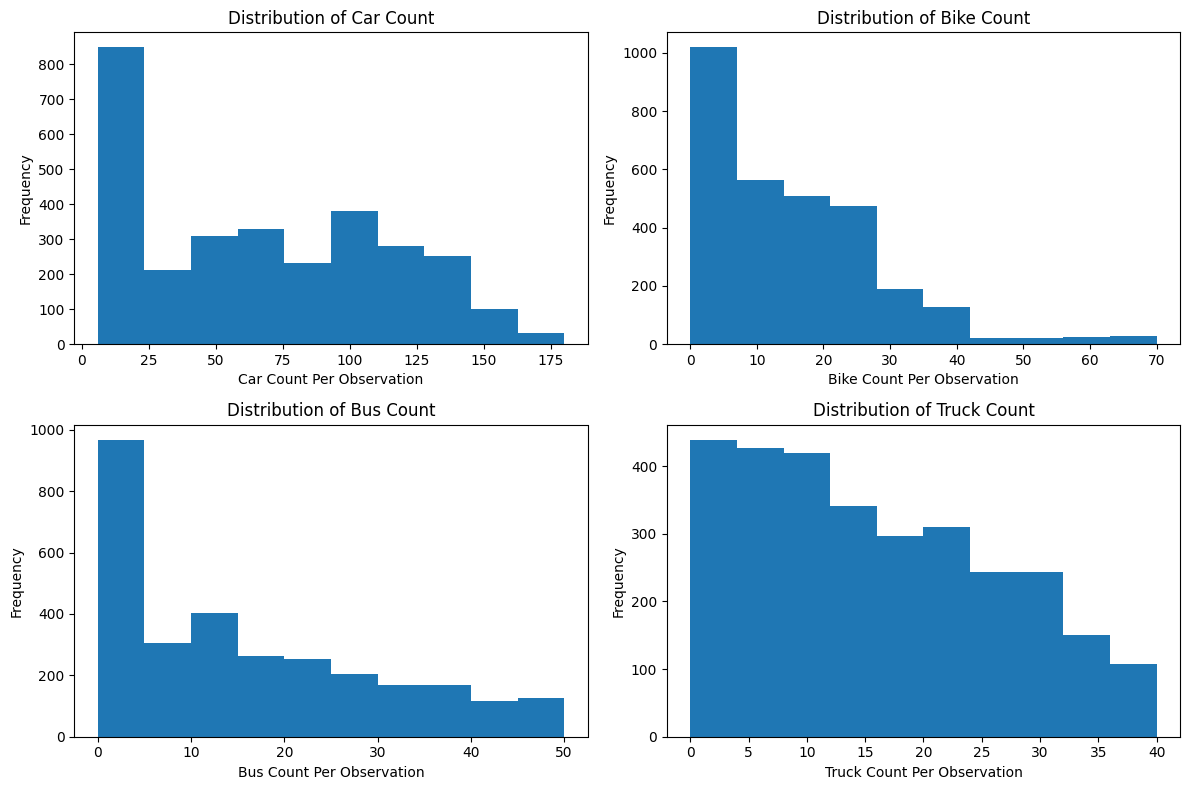

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].hist(df['CarCount'])
axes[0, 0].set_xlabel('Car Count Per Observation')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Car Count')

axes[0, 1].hist(df['BikeCount'])
axes[0, 1].set_xlabel('Bike Count Per Observation')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Bike Count')

axes[1, 0].hist(df['BusCount'])
axes[1, 0].set_xlabel('Bus Count Per Observation')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Bus Count')

axes[1, 1].hist(df['TruckCount'])
axes[1, 1].set_xlabel('Truck Count Per Observation')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Truck Count')

plt.tight_layout()
plt.show()


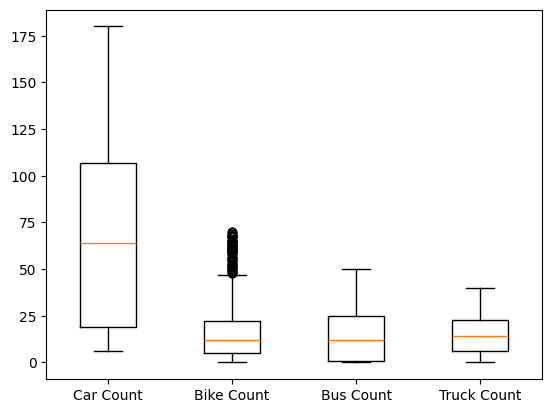

In [10]:
plt.boxplot([df['CarCount'], df['BikeCount'], df['BusCount'], df['TruckCount']])
plt.xticks([1, 2, 3, 4], ['Car Count', 'Bike Count', 'Bus Count', 'Truck Count'])
print()

# 2. Traffic Situation Distribution

,count
Traffic Situation,
normal,1669
heavy,682
high,321
low,304


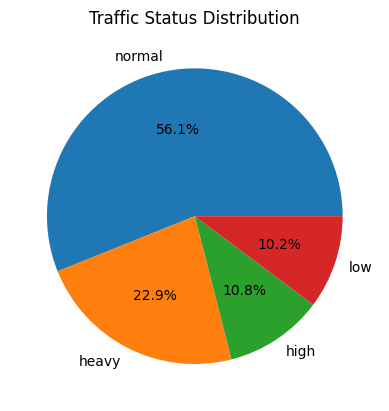

In [29]:
situation_counts = df['Traffic Situation'].value_counts()
plt.pie(situation_counts, labels=situation_counts.index, autopct='%1.1f%%')
plt.title('Traffic Status Distribution')

Text(0.5, 1.0, 'Traffic Status Distribution')

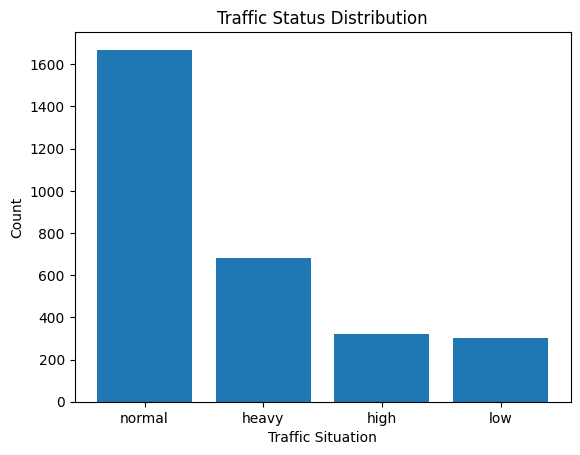

In [37]:
plt.bar(df['Traffic Situation'].value_counts().index, df['Traffic Situation'].value_counts())
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.title('Traffic Status Distribution')

# 3. Variation by Day of the Week

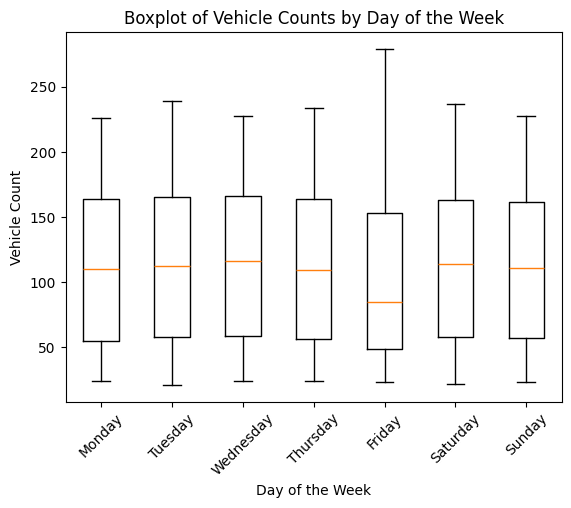

In [73]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of the week'] = pd.Categorical(df['Day of the week'], categories=days_order, ordered=True)
totalVehicleCountPerDay = df.groupby(['Day of the week'],observed=True)['Total'].apply(list)
plt.boxplot(totalVehicleCountPerDay)
plt.xticks([1, 2, 3, 4,5,6,7], days_order,rotation=45)
plt.title("Boxplot of Vehicle Counts by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Vehicle Count")
print()